In [1]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import matplotlib.pyplot as plt
import numpy as np
import os
import numpy as np
from scipy.stats import norm
import scipy as sp
h = 6.62607004*10**(-34)
c = 299792458
k = 1.38064852*10**(-23)

#w=wavelength
#T=temperature

def planck(w,T):
    return ((2*np.pi*(c**2)*h)/(np.power(w,5)))*(1/((np.exp(h*c/(w*k*T))-1)))



8695.525688020014


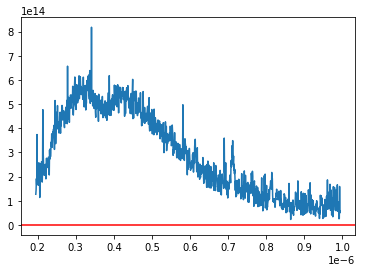

In [155]:
df = pd.read_excel('/Users/korashassani/Documents/School/fall semester 2019/advanced lab/SL/addeddata.xlsx')




#yadd1=900

wav1 = np.array(df[191.14].tolist())*1e-9


temp1=2.989*10**6/(wav1[190]/1e-9)
print(temp1)

y = np.array(df[2441.13].tolist())*yscale1
#for scaling do i+scale
yscale1 =.7*10**(12)
#yadd1=planck(wav1,8995)[1]-.8e14
yadd1=.7e15
y1 = [i+yadd1 for i in y]
wav1 = wav1[4:len(wav1)-4]
y1 = y1[4:len(y1)-4]
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.axhline(wav1[190],color='r')
plt.plot(wav1,y1)

#plt.plot(x,blackbody_lam(x,9000))



-36540442640969.625
144291000000000.0 204888066014111.84
2.288587222471295e+24
[8389.32167001]
[[67.22274052]]


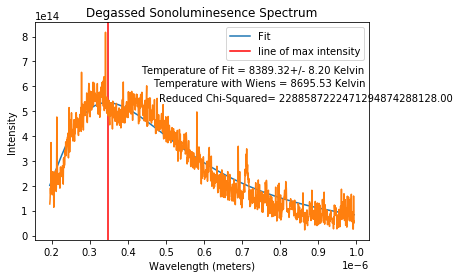

In [185]:
#fitting data

menStd1=np.repeat(np.sqrt(len(y1)),len(y1))
#menStd1 = np.sqrt(y1)
popt, pcov = sp.optimize.curve_fit(planck,  wav1,  y1, sigma=menStd1, bounds=(0, [10000]))

#chi-squared analysis
r1 = y1 - planck(wav1, popt[0])
print(y1[100]-planck(wav1,popt[0])[100])
print(y1[1],planck(wav1,popt[0])[1])
chisqr1=sum((r1 ** 2)/(menStd1**2))


#reduced chisquared= 1/(n- #variables-1)*chisquared
reduced1=(1/(len(y1)-4))*chisqr1
print(reduced1)

print(popt)
print(pcov)

plt.xlabel("Wavelength (meters)")

plt.ylabel("Intensity")
plt.title("Degassed Sonoluminesence Spectrum")

plt.text(wav1[300],y1[190]+1.3e14,"Temperature of Fit = {0:0.2f}+/- {1:0.2f} Kelvin".format(popt[0],np.sqrt(pcov[0][0])))
plt.text(wav1[340],y1[190]+.8e14,"Temperature with Wiens = {0:0.2f} Kelvin".format(temp1))
plt.text(wav1[360],y1[190]+.2e14,"Reduced Chi-Squared= {0:.2f}".format(reduced1))
plt.plot(wav1,planck(wav1,*popt))
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.errorbar(wav1,y1,yerr=2*menStd1)
#plt.plot(wav1,y1)
plt.axvline(wav1[190],color='r')
plt.legend(("Fit","line of max intensity"))
plt.show()

9581.049459883963


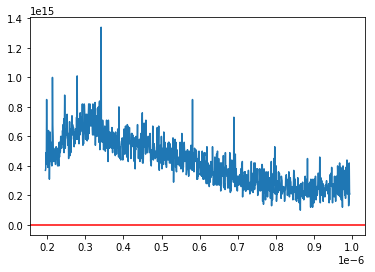

In [175]:
dfa = pd.read_excel('/Users/korashassani/Documents/School/fall semester 2019/advanced lab/SL/argondata.xlsx')



wav2 = np.array(dfa[191.14].tolist())*1e-9

temp2=2.989*10**6/(wav2[150]/1e-9)
print(temp2)

y2 = np.array(dfa[344.00].tolist())*yscale2
yscale2 =1*10**(13)
#yadd2=planck(wav2,9573)[1]+1e14
yadd2=1.5e15
y2 = [i+yadd2 for i in y2]


wav2 = wav2[4:len(wav2)-4]
y2 = y2[4:len(y2)-4]
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.axhline(wav1[190],color='r')
plt.plot(wav1,y2)

[19235384.06167135 19493588.68961793 22135943.62117866 ...
 20493901.5319192  14832396.97419133 14491376.74618944]
33662264290541.86


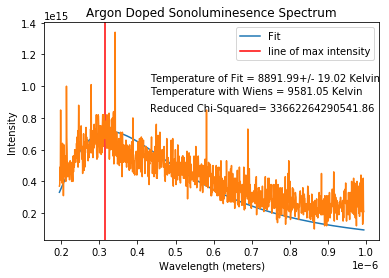

In [186]:
menStd2 = np.sqrt(y2)
print(menStd2)
pop, pco = sp.optimize.curve_fit(planck,  wav2, y2,sigma=menStd2, bounds=(0, [10000]))
#pop, pco = sp.optimize.curve_fit(planck,  wav2, y2, bounds=(0, [10000]))
#chi-squared analysis
r2 = y2 - planck(wav2, pop[0])
chisqr2=sum((r2 ** 2)/(menStd2**2))


#reduced chisquared= 1/(n- #variables-1)*chisquared
reduced2=(1/(len(y2)-1))*chisqr2
print(reduced2)

plt.xlabel("Wavelength (meters)")
plt.ylabel("Intensity")
plt.title("Argon Doped Sonoluminesence Spectrum")

plt.text(wav2[300],y2[190]+4.3e14,"Temperature of Fit = {0:0.2f}+/- {1:0.2f} Kelvin".format(pop[0],np.sqrt(pco[0][0])))
plt.text(wav2[300],y2[190]+3.5e14,"Temperature with Wiens = {0:0.2f} Kelvin".format(temp2))
plt.text(wav2[300],y2[190]+2.4e14,"Reduced Chi-Squared= {0:.2f}".format(reduced2))
#plt.text(4,(y[0]+y[2])/2,"Reduced Chi-Squared= {0:.2f}".format(reduced))

plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.plot(wav2,planck(wav2,*pop))
plt.errorbar(wav2,y2,yerr=2*menStd2)
#plt.plot(wav2,y2)
plt.axvline(wav2[150],color='r')
plt.legend(("Fit","line of max intensity"))

plt.show()